In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import nltk
import networkx as nx
import json

In [37]:
df = pd.read_csv('data/trade-register-cleaned.csv',encoding='Latin-1')
df.head(1)

,Recipient,Supplier,Year of order,Year of order estimate,Number ordered,Number ordered estimate,Weapon designation,Weapon description,Number delivered,Number delivered estimate,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Belarus,2018.0,NaN,4.0,NaN,Mi-24V/Mi-35,combat helicopter,4.0,NaN,2019,Second hand,Second-hand; financed by India,3.4,13.6,13.6


### Dropping entries with invalid/empty entries

In [38]:
df['Year of order estimate'] = df['Year of order estimate'].notna()
df['Number ordered estimate'] = df['Number ordered estimate'].notna()
df['Number delivered estimate'] = df['Number delivered estimate'].notna()

In [39]:
print(df[df['Number ordered'].isna() | df['Number delivered'].isna()].shape, "have empty quantities")
df[df['Number ordered'].isna() | df['Number delivered'].isna()]
df = df.dropna(subset=['Number ordered','Number delivered','Year of order'])

(231, 16) have empty quantities


In [40]:
#Some columns should be ints
df['Number ordered'] = df['Number ordered'].astype('int')
df['Number delivered'] = df['Number delivered'].astype('int')
df['Year of order'] = df['Year of order'].astype('int')

In [41]:
print(df.shape)
df.head()

(28827, 16)


,Recipient,Supplier,Year of order,Year of order estimate,Number ordered,Number ordered estimate,Weapon designation,Weapon description,Number delivered,Number delivered estimate,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Belarus,2018,False,4,False,Mi-24V/Mi-35,combat helicopter,4,False,2019,Second hand,Second-hand; financed by India,3.40,13.60,13.60
1,Afghanistan,Bosnia-Herzegovina,2009,False,60,False,D-30 122mm,towed gun,60,True,2011,Second hand but modernized,Second-hand but modernized before delivery,0.23,13.86,13.86
2,Afghanistan,Bosnia-Herzegovina,2012,True,20,True,D-30 122mm,towed gun,20,False,2013,Second hand,Second-hand,0.14,2.80,2.80
3,Afghanistan,Brazil,2013,False,20,False,EMB-314 Super Tucano,trainer/combat aircraft,20,True,2016,New,$427 m 'LAS' deal (financed by USA); A-29B ver...,4.50,90.00,90.00
4,Afghanistan,Brazil,2017,False,6,False,EMB-314 Super Tucano,trainer/combat aircraft,6,True,2018,New,A-29B version; financed by USA; ordered via US...,4.50,27.00,27.00


# Creating our Collective

## Temporally restrict
We will restrict our entires to a certain timeframe

In [71]:
def create_network(df:pd.DataFrame, year:int):
    df = df[df['Year of order'] >= year]
    df = df[['Recipient','Supplier']]
    df = df.drop_duplicates()
    df = df[~df['Recipient'].str.contains('\*') & ~df['Supplier'].str.contains('\*')]
    
    with open('country_list.json','r') as json_file:
        nodelist = json.load(json_file)
    nodelist = [node for node in nodelist if '*' not in node]
    
    network =  nx.from_pandas_edgelist(df, 'Supplier', 'Recipient', create_using=nx.DiGraph())
    network.add_nodes_from(nodelist)
    return network

In [79]:
density_dict = {}
node_list = {}
for year in range(1950,2023):

    network = create_network(df,year)
    density_dict[year] = nx.density(network)
    node_list[year] = len(network.nodes())

In [80]:
node_list

{1950: 207,
 1951: 207,
 1952: 207,
 1953: 207,
 1954: 207,
 1955: 207,
 1956: 207,
 1957: 207,
 1958: 207,
 1959: 207,
 1960: 207,
 1961: 207,
 1962: 206,
 1963: 206,
 1964: 206,
 1965: 206,
 1966: 206,
 1967: 206,
 1968: 206,
 1969: 205,
 1970: 204,
 1971: 204,
 1972: 204,
 1973: 203,
 1974: 203,
 1975: 203,
 1976: 203,
 1977: 203,
 1978: 203,
 1979: 203,
 1980: 203,
 1981: 203,
 1982: 203,
 1983: 203,
 1984: 202,
 1985: 200,
 1986: 200,
 1987: 199,
 1988: 199,
 1989: 197,
 1990: 196,
 1991: 196,
 1992: 193,
 1993: 192,
 1994: 192,
 1995: 192,
 1996: 192,
 1997: 191,
 1998: 191,
 1999: 190,
 2000: 190,
 2001: 190,
 2002: 190,
 2003: 190,
 2004: 190,
 2005: 190,
 2006: 190,
 2007: 190,
 2008: 190,
 2009: 190,
 2010: 190,
 2011: 190,
 2012: 190,
 2013: 190,
 2014: 190,
 2015: 190,
 2016: 190,
 2017: 190,
 2018: 190,
 2019: 190,
 2020: 190,
 2021: 190,
 2022: 190}

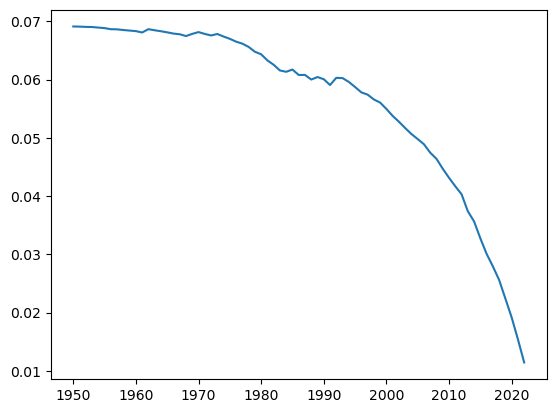

In [68]:
plt.plot(density_dict.keys(), density_dict.values())

## Filtering for States Only

In [ ]:
non_state_df = df[df['Recipient'].str.contains('\*') | df['Supplier'].str.contains('\*')]
non_state_df.head(5)

,Recipient,Supplier,Year of order,Year of order estimate,Number ordered,Number ordered estimate,Weapon designation,Weapon description,Number delivered,Number delivered estimate,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons


In [ ]:
df = df[~df['Recipient'].str.contains('\*') & ~df['Supplier'].str.contains('\*')]

## Including small-scale arms transfers

In [ ]:
df[df['Number ordered'] == 0].head()

,Recipient,Supplier,Year of order,Year of order estimate,Number ordered,Number ordered estimate,Weapon designation,Weapon description,Number delivered,Number delivered estimate,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
3015,Brazil,United Kingdom,2012,False,0,False,air refuel system,air refuel system,1,True,2022,New,For KC-390 tanker/transport aircraft produced ...,10.00,0.0,10.00
4423,China,France,2005,True,0,False,aircraft engine,aircraft engine,630,True,2012; 2013; 2014; 2015; 2016; 2017; 2018; 2019...,New,Turbomeca Arriel-2C (850hp) turboshaft; for Z-...,0.35,0.0,220.50
4426,China,France,1988,False,0,True,AS365/AS565 Panther,helicopter,457,True,1992; 1993; 1994; 1995; 1996; 1997; 1998; 1999...,New,Produced under licence in China as Z-9A or Z-9...,3.25,0.0,1485.25
4461,China,Germany,1981,True,0,True,vehicle engine,vehicle engine,4850,True,1982; 1983; 1984; 1985; 1986; 1987; 1988; 1989...,New,Deutz BF-8L413F; BF-8L513F and BF-8L4 (320-360...,0.05,0.0,242.50
5250,Croatia,Israel,2023,True,0,False,Spike-MR/LR,anti-tank missile,0,False,NaN,New,Spike-LR version; for AMV IFV; delivery planne...,0.03,0.0,0.00


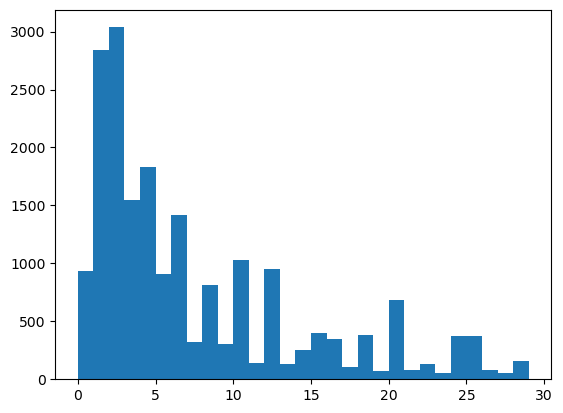

In [ ]:
plt.hist(df['Number delivered'],bins=range(0,30))
plt.xlabel('Number of Mentions')
plt.show()